In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_elephant = pd.read_csv('elephant_database.csv')
df_mike = pd.read_csv('MIKE_stats.csv')
df_ivory = pd.read_csv('ivory_trade.csv',index_col=0)

In [3]:
df_elephant = df_elephant[df_elephant['Method']!='Aggregate']
df_elephant = df_elephant[df_elephant['Estimate']!= 0]
df_elephant

,Location,Country,Region,Year,Estimate,95% CL,Range (km2),Method
12,Banyang-Mbo Wildlife Sanctuary,Cameroon,Central Africa,2007,153,52,667,Dung count
13,Campo Ma’an Landscape,Cameroon,Central Africa,2014,539,132,4608,Dung count
14,Deng Deng National Park,Cameroon,Central Africa,2012,1,0,884,Dung count
15,Korup National Park,Cameroon,Central Africa,2011,10,10,1259,Predictive Model
16,Mbam et Djerem National Park,Cameroon,Central Africa,2009,901,388,1433,Dung count
17,Mengame Wildlife Sanctuary and Kom National Park,Cameroon,Central Africa,2011,10,0,10000,Predictive Model
18,Mt. Cameroon National Park,Cameroon,Central Africa,2013,118,0,676,Survey
19,Boumba-Bek National Park,Cameroon,Central Africa,2015,143,78,2499,Dung count
20,Dja Faunal Reserve,Cameroon,Central Africa,2015,420,125,5260,Dung count
21,Lobeke National Park,Cameroon,Central Africa,2015,1029,456,2173,Dung count


In [4]:
df_elephant['Method'].unique()

array(['Dung count', 'Predictive Model', 'Survey', 'Aerial', 'Recce',
       'Survey, guess',
       'Indirect observations of dung and tracks, Camera traps', 'NEAP',
       'Locals', 'Guess', 'Dung and track counts', 'Unclear', 'Dung',
       'Dung Count'], dtype=object)

In [5]:
df_elephant['Method'].replace({'Recce':'Survey','Survey, guess':'Survey','Indirect observations of dung and tracks, Camera traps':'Survey','NEAP':'Survey','Locals':'Guess','Dung and track counts':'Dung count','Dung':'Dung count','Dung Count':'Dung count'},inplace=True)

In [6]:
df_mike = df_mike[df_mike['UNRegion']=='Africa']
cols = ['SubregionName','CountryCode','CountryName','MIKEsiteName','year','TotalNumberOfCarcasses','NumberOfIllegalCarcasses']
df_mike = df_mike[cols]
df_mike.rename(columns={'SubregionName':'Region', 'CountryName': 'Country','MIKEsiteName':'Location', 'year':'Year'},inplace=True)
df_mike

,Region,CountryCode,Country,Location,Year,TotalNumberOfCarcasses,NumberOfIllegalCarcasses
0,Eastern Africa,rw,Rwanda,Akagera,2014,0,0
1,Eastern Africa,rw,Rwanda,Akagera,2013,1,0
2,Eastern Africa,rw,Rwanda,Akagera,2010,1,0
3,Eastern Africa,rw,Rwanda,Akagera,2018,4,0
4,Eastern Africa,rw,Rwanda,Akagera,2011,4,1
5,Eastern Africa,rw,Rwanda,Akagera,2006,1,0
6,Eastern Africa,rw,Rwanda,Akagera,2012,3,0
10,Central Africa,cm,Cameroon,Boumba-Bek,2012,8,7
11,Central Africa,cm,Cameroon,Boumba-Bek,2004,7,5
12,Central Africa,cm,Cameroon,Boumba-Bek,2006,12,0


In [7]:
df_mike['NumberOfLegalCarcasses'] = df_mike['TotalNumberOfCarcasses'] - df_mike['NumberOfIllegalCarcasses']
df_mike['PercentPoached'] = df_mike['NumberOfIllegalCarcasses']/df_mike['TotalNumberOfCarcasses']

In [8]:
cols = ['Importer','Exporter','Importer reported quantity','Exporter reported quantity','Term','Purpose']
df_ivory = df_ivory[cols]
df_ivory

,Importer,Exporter,Importer reported quantity,Exporter reported quantity,Term,Purpose
Year,,,,,,
1989,AD,ZW,NaN,1.0,hair products,NaN
1989,AD,ZW,NaN,2.0,tusks,NaN
1989,AE,FR,NaN,76.0,leather products (small),NaN
1989,AE,GB,NaN,1.0,ivory pieces,T
1989,AE,MC,NaN,19.0,hair products,T
1989,AE,ZA,NaN,1.0,ivory carvings,P
1989,AE,ZW,NaN,23.0,ivory carvings,NaN
1989,AE,ZW,NaN,1.0,tusks,NaN
1989,AN,MW,NaN,650.0,ivory carvings,P


In [9]:
df_ivory = df_ivory.fillna(0)
df_ivory['Quantity']=df_ivory['Importer reported quantity']+df_ivory['Exporter reported quantity']
df_ivory.drop(columns=['Importer reported quantity','Exporter reported quantity'],inplace=True)
df_ivory['Year']=df_ivory.index
df_ivory

,Importer,Exporter,Term,Purpose,Quantity,Year
Year,,,,,,
1989,AD,ZW,hair products,0,1.0,1989
1989,AD,ZW,tusks,0,2.0,1989
1989,AE,FR,leather products (small),0,76.0,1989
1989,AE,GB,ivory pieces,T,1.0,1989
1989,AE,MC,hair products,T,19.0,1989
1989,AE,ZA,ivory carvings,P,1.0,1989
1989,AE,ZW,ivory carvings,0,23.0,1989
1989,AE,ZW,tusks,0,1.0,1989
1989,AN,MW,ivory carvings,P,650.0,1989


In [10]:
country_dict = dict(zip(df_mike['CountryCode'].str.upper(), df_mike['Country']))
country_dict

{'RW': 'Rwanda',
 'CM': 'Cameroon',
 'ET': 'Ethiopia',
 'CF': 'Central African Republic',
 'ZW': 'Zimbabwe',
 'BW': 'Botswana',
 'KE': 'Kenya',
 'NA': 'Namibia',
 'TG': 'Togo',
 'CD': 'Democratic Republic of the Congo',
 'ML': 'Mali',
 'ER': 'Eritrea',
 'GH': 'Ghana',
 'ZM': 'Zambia',
 'ZA': 'South Africa',
 'MW': 'Malawi',
 'TZ': 'United Republic of Tanzania',
 'GA': 'Gabon',
 'MZ': 'Mozambique',
 'CI': "Cote d'Ivoire",
 'UG': 'Uganda',
 'BF': 'Burkina Faso',
 'CG': 'Congo',
 'SN': 'Senegal',
 'BJ': 'Benin',
 'LR': 'Liberia',
 'NE': 'Niger',
 'NG': 'Nigeria',
 'TD': 'Chad',
 'GN': 'Guinea'}

In [11]:
df_ivory = df_ivory.replace({'Importer': country_dict, 'Exporter': country_dict})
df_ivory.reset_index(drop=True, inplace=True)
df_ivory

,Importer,Exporter,Term,Purpose,Quantity,Year
0,AD,Zimbabwe,hair products,0,1.0,1989
1,AD,Zimbabwe,tusks,0,2.0,1989
2,AE,FR,leather products (small),0,76.0,1989
3,AE,GB,ivory pieces,T,1.0,1989
4,AE,MC,hair products,T,19.0,1989
5,AE,South Africa,ivory carvings,P,1.0,1989
6,AE,Zimbabwe,ivory carvings,0,23.0,1989
7,AE,Zimbabwe,tusks,0,1.0,1989
8,AN,Malawi,ivory carvings,P,650.0,1989
9,AO,Zimbabwe,ivory carvings,0,8.0,1989


[Text(0,0,'2002'),
 Text(0,0,'2003'),
 Text(0,0,'2004'),
 Text(0,0,'2005'),
 Text(0,0,'2006'),
 Text(0,0,'2007'),
 Text(0,0,'2008'),
 Text(0,0,'2009'),
 Text(0,0,'2010'),
 Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014'),
 Text(0,0,'2015'),
 Text(0,0,'2016'),
 Text(0,0,'2017'),
 Text(0,0,'2018')]

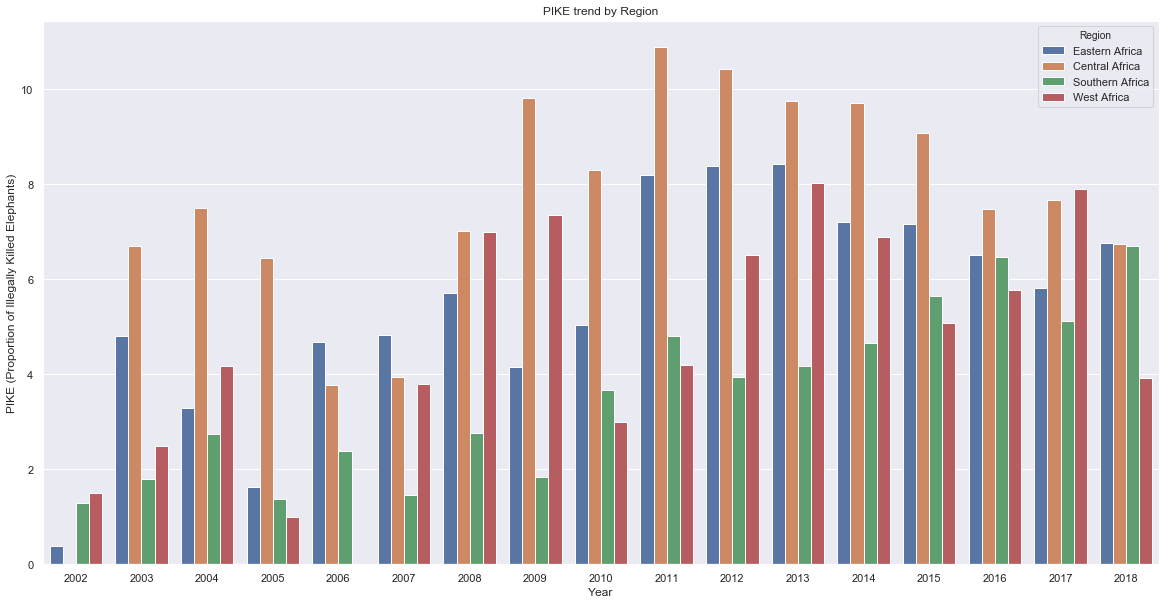

In [12]:
dim = (20,10)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=dim)
ax = sns.barplot(x='Year', y='PercentPoached',hue='Region',data=df_mike, ci=None, estimator=sum)
ax.set_title('PIKE trend by Region')
ax.set_xlabel('Year')
ax.set_ylabel('PIKE (Proportion of Illegally Killed Elephants)')
ax.set_xticklabels(ax.get_xticklabels())

[Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'')]

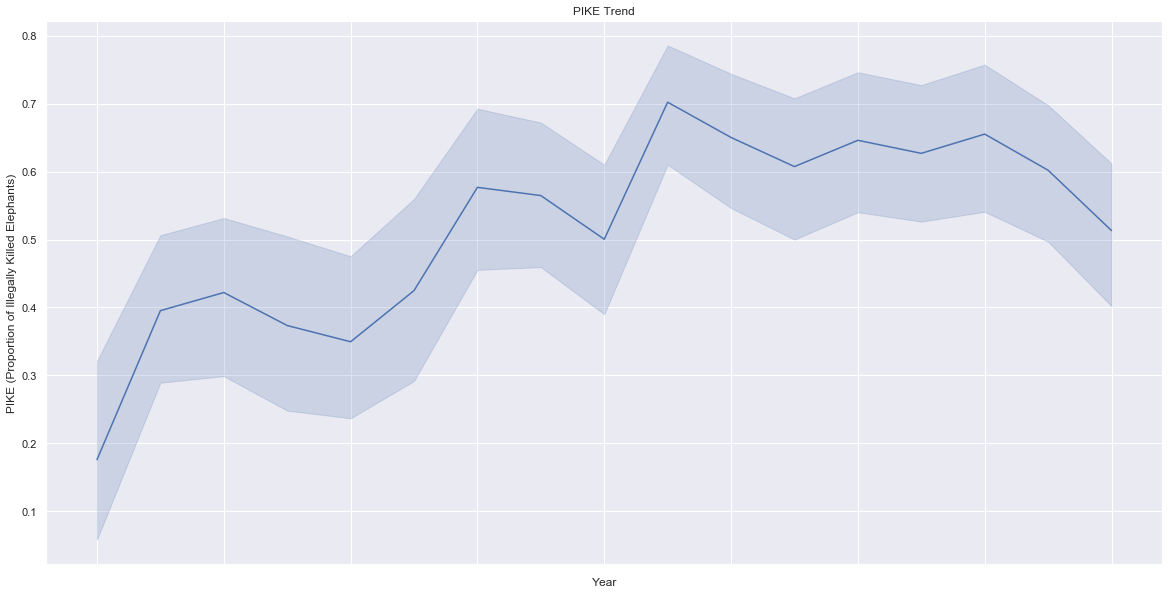

In [13]:
dim = (20,10)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=dim)
ax = sns.lineplot(x='Year', y='PercentPoached',data=df_mike)
ax.set_title('PIKE Trend')
ax.set_xlabel('Year')
ax.set_ylabel('PIKE (Proportion of Illegally Killed Elephants)')
ax.set_xticklabels(ax.get_xticklabels())

[Text(0,0,'2002'),
 Text(0,0,'2003'),
 Text(0,0,'2004'),
 Text(0,0,'2005'),
 Text(0,0,'2006'),
 Text(0,0,'2007'),
 Text(0,0,'2008'),
 Text(0,0,'2009'),
 Text(0,0,'2010'),
 Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014'),
 Text(0,0,'2015'),
 Text(0,0,'2016'),
 Text(0,0,'2017'),
 Text(0,0,'2018')]

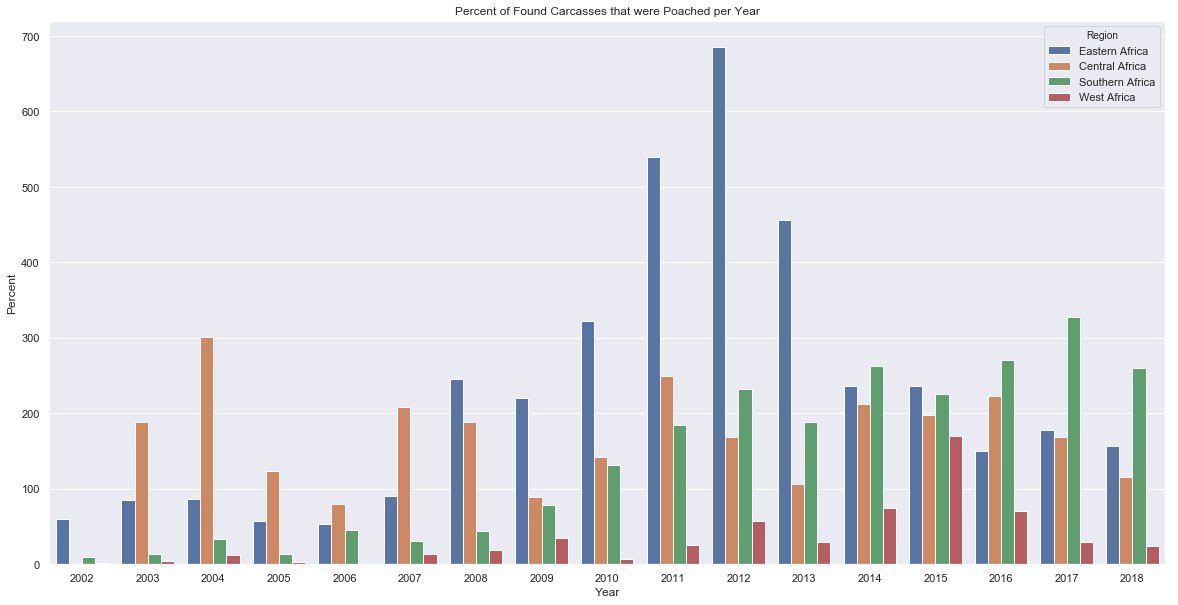

In [14]:
dim = (20,10)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=dim)
ax = sns.barplot(x='Year', y='NumberOfIllegalCarcasses',hue='Region',data=df_mike, ci=None, estimator=sum)
ax.set_title('Percent of Found Carcasses that were Poached per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Percent')
ax.set_xticklabels(ax.get_xticklabels())

[Text(0,0,'2002'),
 Text(0,0,'2003'),
 Text(0,0,'2004'),
 Text(0,0,'2005'),
 Text(0,0,'2006'),
 Text(0,0,'2007'),
 Text(0,0,'2008'),
 Text(0,0,'2009'),
 Text(0,0,'2010'),
 Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014'),
 Text(0,0,'2015'),
 Text(0,0,'2016'),
 Text(0,0,'2017'),
 Text(0,0,'2018')]

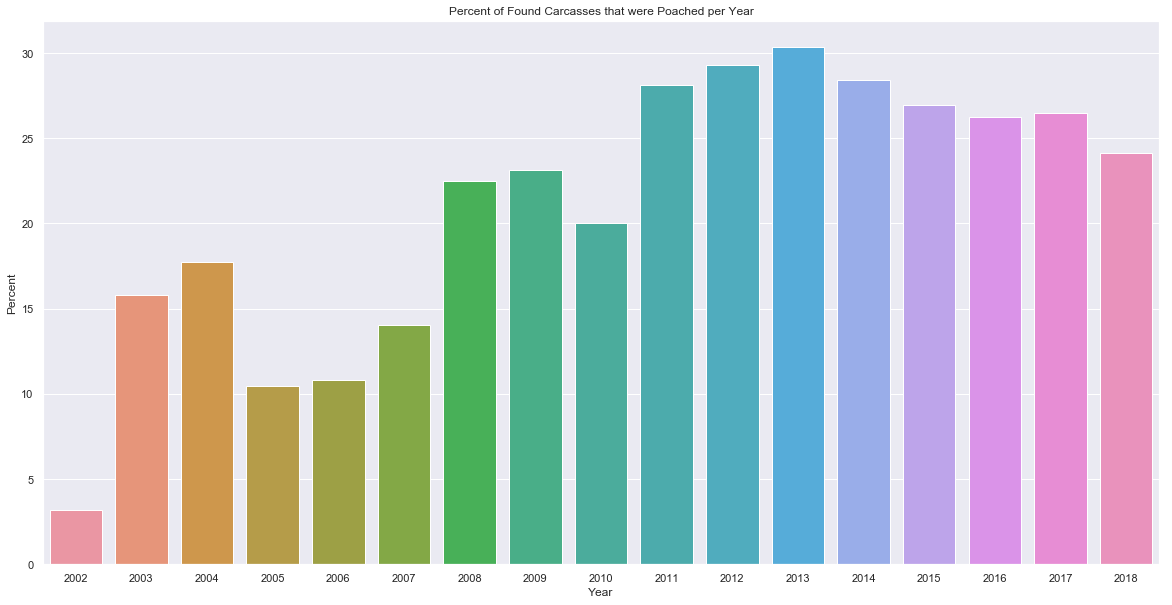

In [15]:
fig, ax = plt.subplots(figsize=dim)
ax = sns.barplot(x='Year', y='PercentPoached',data=df_mike, ci=None, estimator=sum)
ax.set_title('Percent of Found Carcasses that were Poached per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Percent')
ax.set_xticklabels(ax.get_xticklabels())

[Text(0,0,'2002'),
 Text(0,0,'2003'),
 Text(0,0,'2004'),
 Text(0,0,'2005'),
 Text(0,0,'2006'),
 Text(0,0,'2007'),
 Text(0,0,'2008'),
 Text(0,0,'2009'),
 Text(0,0,'2010'),
 Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014'),
 Text(0,0,'2015'),
 Text(0,0,'2016'),
 Text(0,0,'2017'),
 Text(0,0,'2018')]

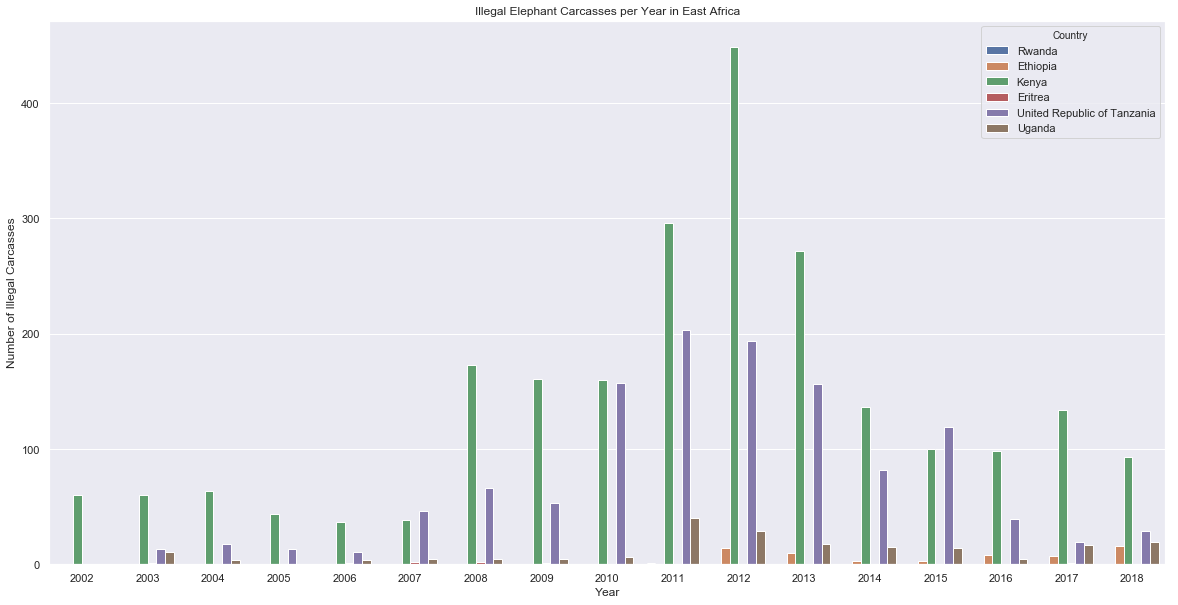

In [16]:
df_mikeeast = df_mike[df_mike['Region']=='Eastern Africa']
fig, ax = plt.subplots(figsize=dim)
ax = sns.barplot(x='Year', y='NumberOfIllegalCarcasses', hue='Country',data=df_mikeeast, ci=None, estimator=sum)
ax.set_title('Illegal Elephant Carcasses per Year in East Africa')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Illegal Carcasses')
ax.set_xticklabels(ax.get_xticklabels())

[Text(0,0,'2002'),
 Text(0,0,'2003'),
 Text(0,0,'2004'),
 Text(0,0,'2005'),
 Text(0,0,'2006'),
 Text(0,0,'2007'),
 Text(0,0,'2008'),
 Text(0,0,'2009'),
 Text(0,0,'2010'),
 Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014'),
 Text(0,0,'2015'),
 Text(0,0,'2016'),
 Text(0,0,'2017'),
 Text(0,0,'2018')]

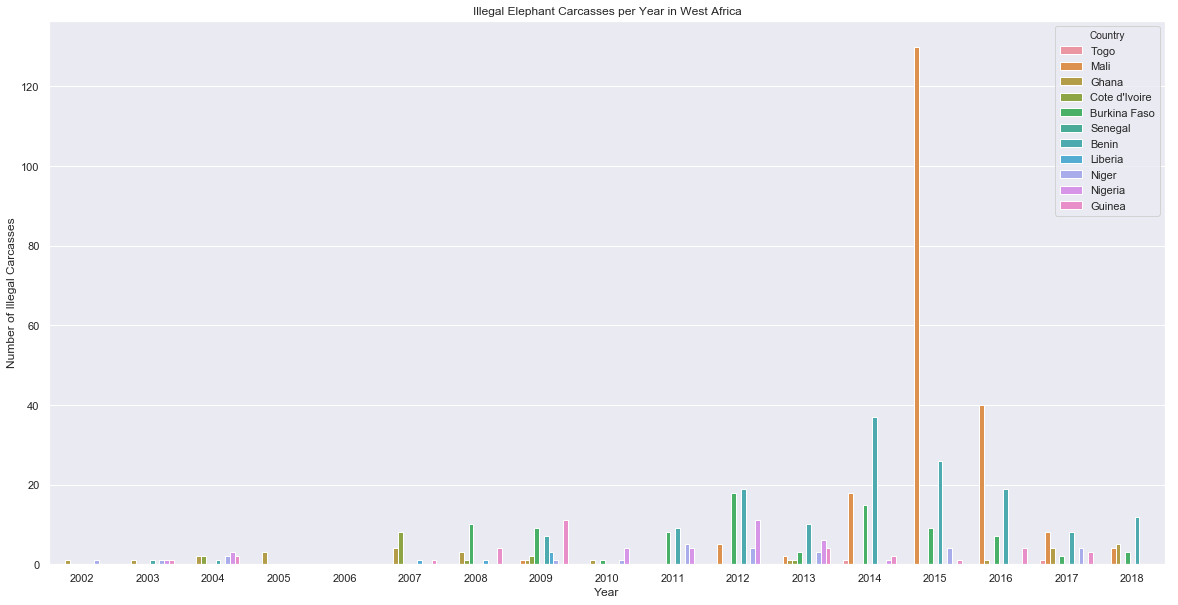

In [17]:
df_mikeeast = df_mike[df_mike['Region']=='West Africa']
fig, ax = plt.subplots(figsize=dim)
ax = sns.barplot(x='Year', y='NumberOfIllegalCarcasses', hue='Country',data=df_mikeeast, ci=None, estimator=sum)
ax.set_title('Illegal Elephant Carcasses per Year in West Africa')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Illegal Carcasses')
ax.set_xticklabels(ax.get_xticklabels())

[Text(0,0,'2002'),
 Text(0,0,'2003'),
 Text(0,0,'2004'),
 Text(0,0,'2005'),
 Text(0,0,'2006'),
 Text(0,0,'2007'),
 Text(0,0,'2008'),
 Text(0,0,'2009'),
 Text(0,0,'2010'),
 Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014'),
 Text(0,0,'2015'),
 Text(0,0,'2016'),
 Text(0,0,'2017'),
 Text(0,0,'2018')]

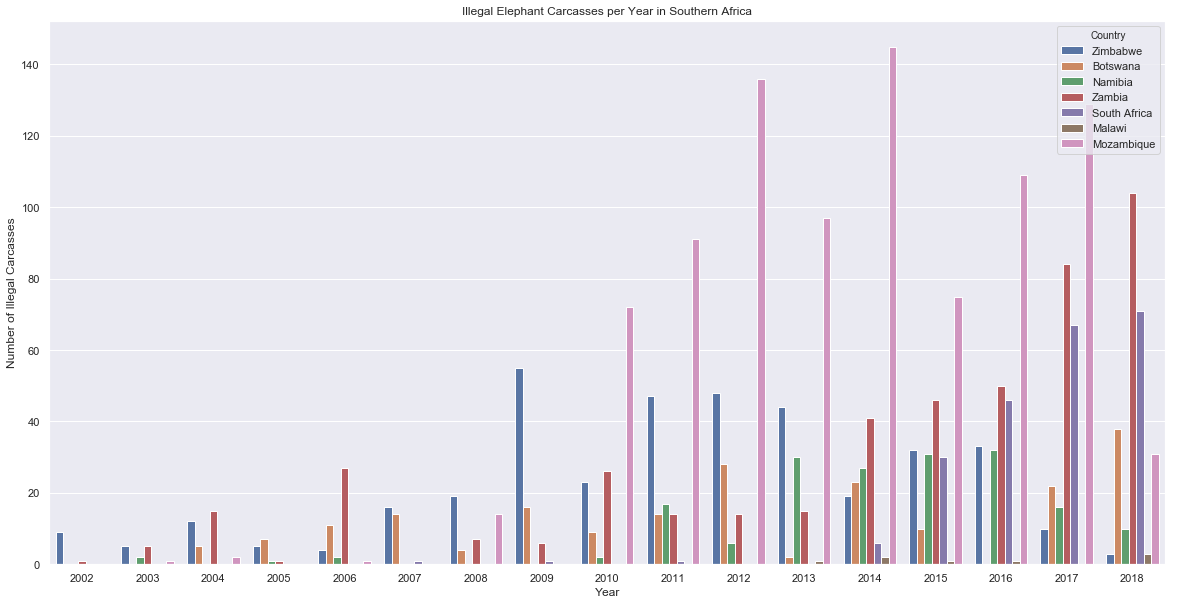

In [18]:
df_mikeeast = df_mike[df_mike['Region']=='Southern Africa']
fig, ax = plt.subplots(figsize=dim)
ax = sns.barplot(x='Year', y='NumberOfIllegalCarcasses', hue='Country',data=df_mikeeast, ci=None, estimator=sum)
ax.set_title('Illegal Elephant Carcasses per Year in Southern Africa')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Illegal Carcasses')
ax.set_xticklabels(ax.get_xticklabels())

[Text(0,0,'2003'),
 Text(0,0,'2004'),
 Text(0,0,'2005'),
 Text(0,0,'2006'),
 Text(0,0,'2007'),
 Text(0,0,'2008'),
 Text(0,0,'2009'),
 Text(0,0,'2010'),
 Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014'),
 Text(0,0,'2015'),
 Text(0,0,'2016'),
 Text(0,0,'2017'),
 Text(0,0,'2018')]

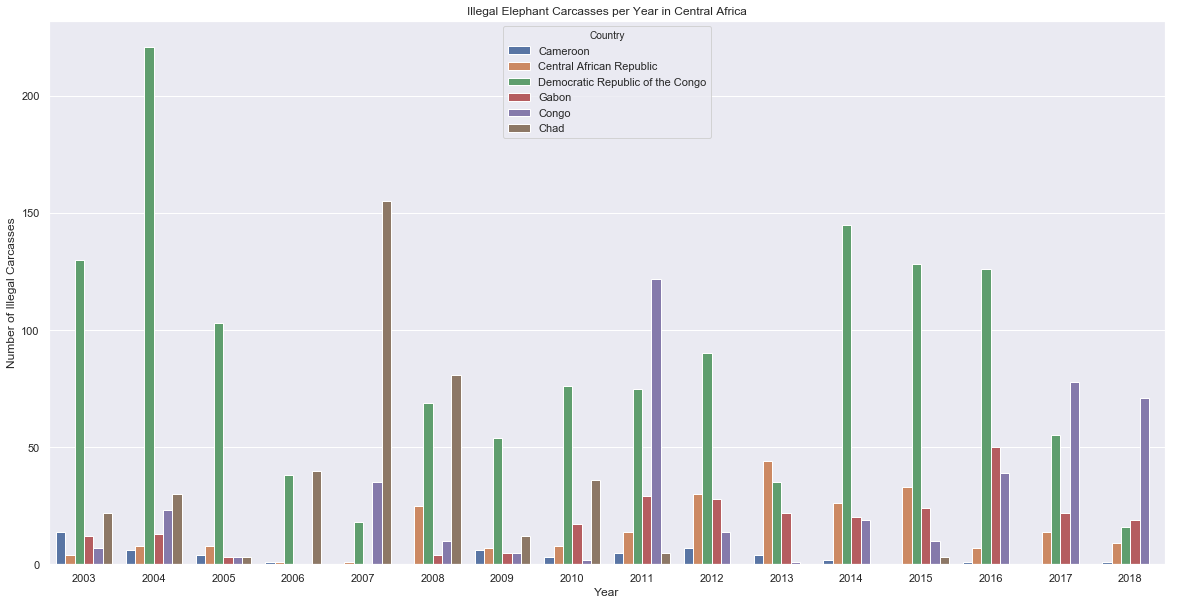

In [19]:
df_mikeeast = df_mike[df_mike['Region']=='Central Africa']
fig, ax = plt.subplots(figsize=dim)
ax = sns.barplot(x='Year', y='NumberOfIllegalCarcasses', hue='Country',data=df_mikeeast, ci=None, estimator=sum)
ax.set_title('Illegal Elephant Carcasses per Year in Central Africa')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Illegal Carcasses')
ax.set_xticklabels(ax.get_xticklabels())

[Text(0,0,'Central Africa'),
 Text(0,0,'Eastern Africa'),
 Text(0,0,'Southern Africa'),
 Text(0,0,'West Africa')]

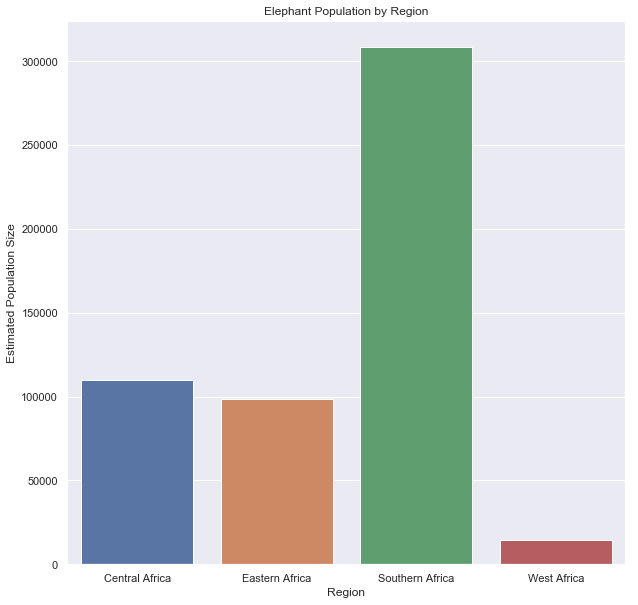

In [20]:
dim = (10,10)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=dim)
ax = sns.barplot(x='Region', y='Estimate',data=df_elephant, ci=None, estimator=sum)
ax.set_title('Elephant Population by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Estimated Population Size')
ax.set_xticklabels(ax.get_xticklabels())

[Text(0,0,'Eritrea'),
 Text(0,0,'Ethiopia'),
 Text(0,0,'Kenya'),
 Text(0,0,'Rwanda'),
 Text(0,0,'Somalia'),
 Text(0,0,'South Sudan'),
 Text(0,0,'Tanzania'),
 Text(0,0,'Uganda')]

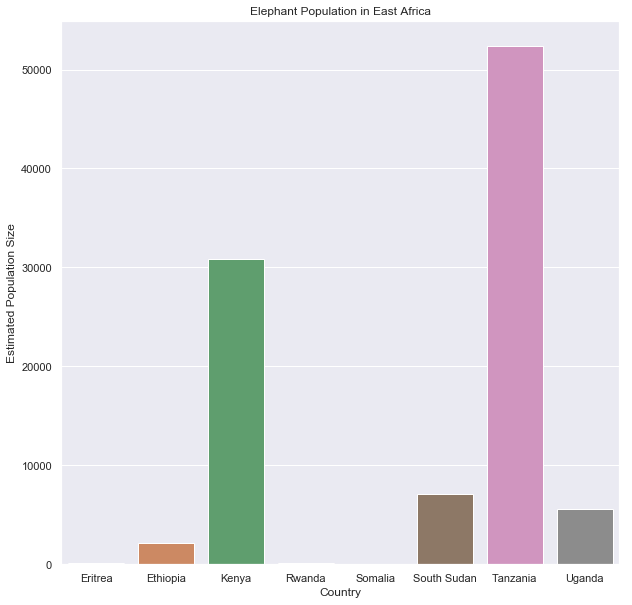

In [21]:
df_elephanteast = df_elephant[df_elephant['Region']=='Eastern Africa']
fig, ax = plt.subplots(figsize=dim)
ax = sns.barplot(x='Country', y='Estimate',data=df_elephanteast, ci=None, estimator=sum)
ax.set_title('Elephant Population in East Africa')
ax.set_xlabel('Country')
ax.set_ylabel('Estimated Population Size')
ax.set_xticklabels(ax.get_xticklabels())

[Text(0,0,'Eritrea'),
 Text(0,0,'Ethiopia'),
 Text(0,0,'Kenya'),
 Text(0,0,'Rwanda'),
 Text(0,0,'Somalia'),
 Text(0,0,'South Sudan'),
 Text(0,0,'Tanzania'),
 Text(0,0,'Uganda')]

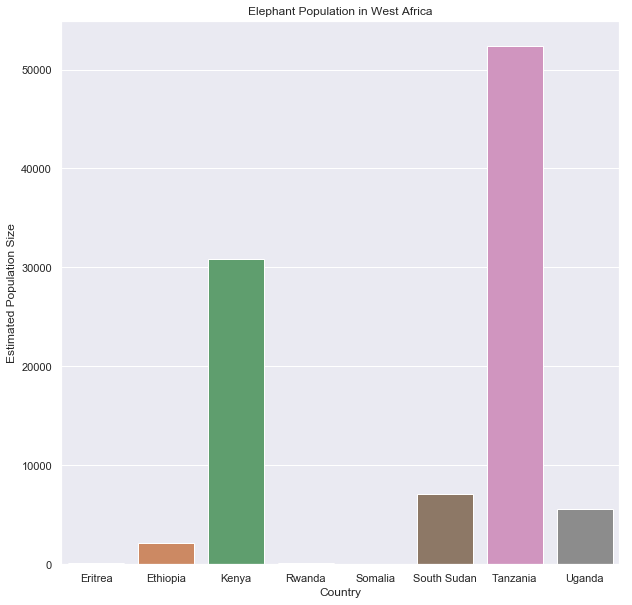

In [22]:
df_elephantwest = df_elephant[df_elephant['Region']=='West Africa']
fig, ax = plt.subplots(figsize=dim)
ax = sns.barplot(x='Country', y='Estimate',data=df_elephanteast, ci=None, estimator=sum)
ax.set_title('Elephant Population in West Africa')
ax.set_xlabel('Country')
ax.set_ylabel('Estimated Population Size')
ax.set_xticklabels(ax.get_xticklabels())

[Text(0,0,'Angola'),
 Text(0,0,'Botswana'),
 Text(0,0,'Malawi'),
 Text(0,0,'Mozambique'),
 Text(0,0,'Namibia'),
 Text(0,0,'South Africa'),
 Text(0,0,'Swaziland'),
 Text(0,0,'Zambia'),
 Text(0,0,'Zimbabwe')]

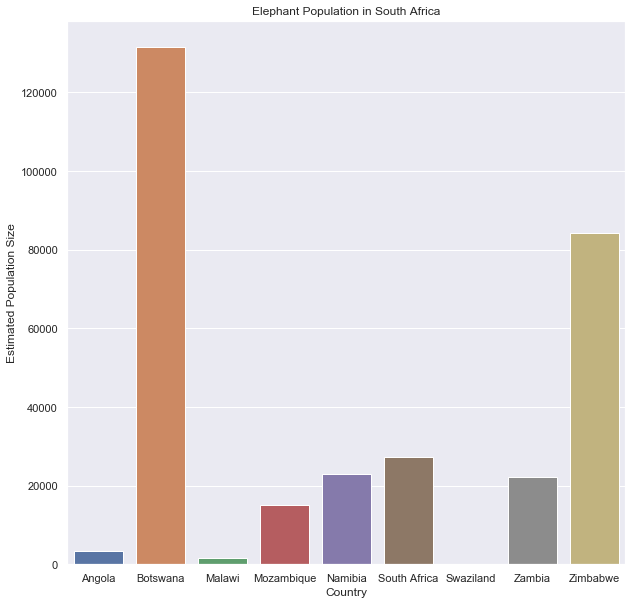

In [23]:
df_elephantsouth = df_elephant[df_elephant['Region']=='Southern Africa']
fig, ax = plt.subplots(figsize=dim)
ax = sns.barplot(x='Country', y='Estimate',data=df_elephantsouth, ci=None, estimator=sum)
ax.set_title('Elephant Population in South Africa')
ax.set_xlabel('Country')
ax.set_ylabel('Estimated Population Size')
ax.set_xticklabels(ax.get_xticklabels())

[Text(0,0,'Cameroon'),
 Text(0,0,'Central African Republic'),
 Text(0,0,'Chad'),
 Text(0,0,'Congo'),
 Text(0,0,'Democratic Republic of Congo'),
 Text(0,0,'Equatorial Guinea'),
 Text(0,0,'Gabon')]

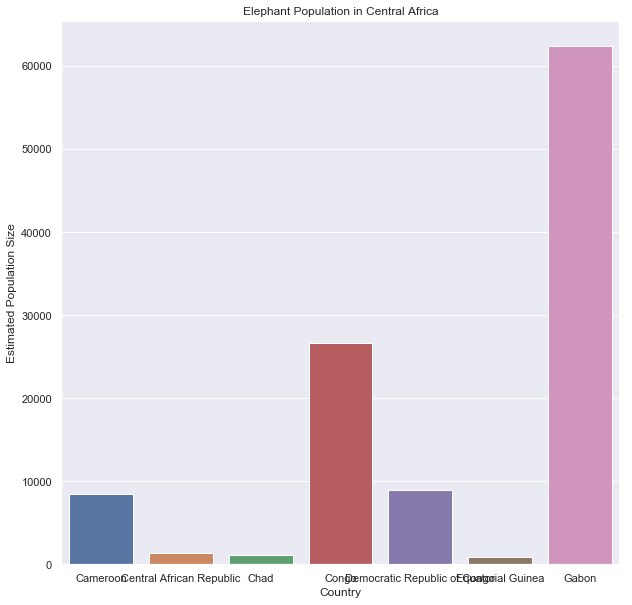

In [24]:
df_elephantcentral = df_elephant[df_elephant['Region']=='Central Africa']
fig, ax = plt.subplots(figsize=dim)
ax = sns.barplot(x='Country', y='Estimate',data=df_elephantcentral, ci=None, estimator=sum)
ax.set_title('Elephant Population in Central Africa')
ax.set_xlabel('Country')
ax.set_ylabel('Estimated Population Size')
ax.set_xticklabels(ax.get_xticklabels())

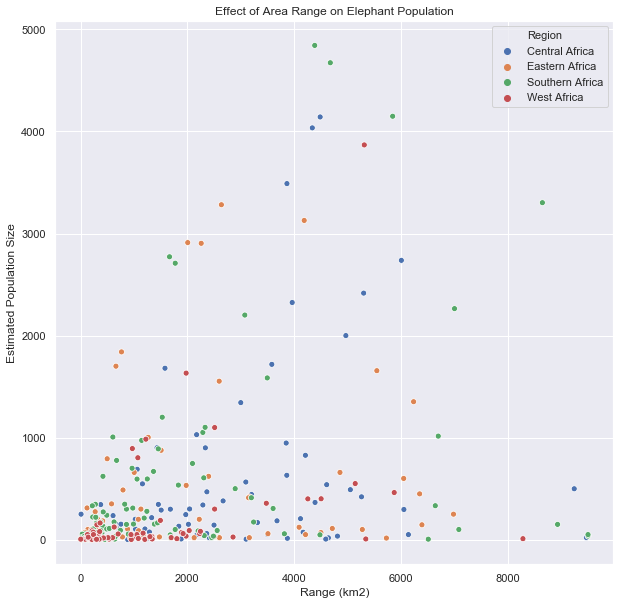

In [25]:
df_elephantrange = df_elephant[(df_elephant['Estimate']<10000)]
df_elephantrange = df_elephantrange[df_elephantrange['Range (km2)']<10000]
fig, ax = plt.subplots(figsize=dim)
ax = sns.scatterplot(x='Range (km2)', y='Estimate', hue='Region',data=df_elephantrange, ci=None)
ax.set_title('Effect of Area Range on Elephant Population')
ax.set_xlabel('Range (km2)')
ax.set_ylabel('Estimated Population Size')
ax.legend()

[Text(0,0,'Dung count'),
 Text(0,0,'Predictive Model'),
 Text(0,0,'Survey'),
 Text(0,0,'Aerial'),
 Text(0,0,'Guess'),
 Text(0,0,'Unclear')]

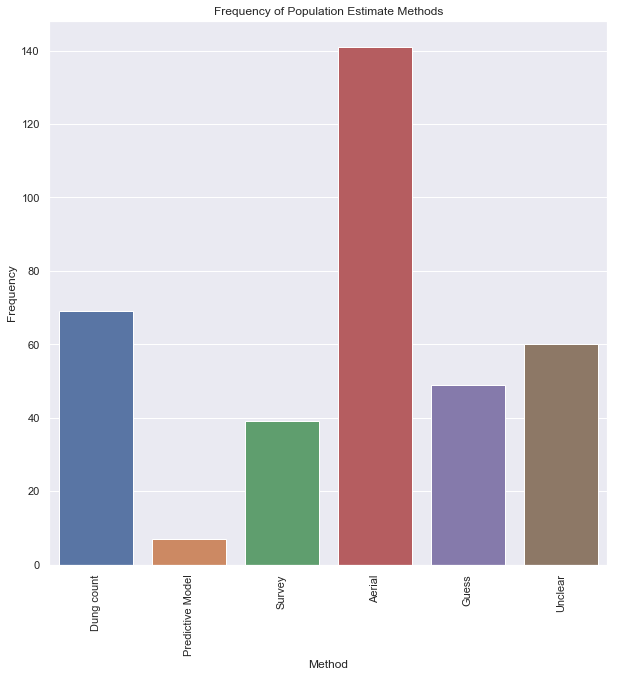

In [26]:
fig, ax = plt.subplots(figsize=dim)
ax = sns.countplot(x='Method',data=df_elephant)
ax.set_title('Frequency of Population Estimate Methods')
ax.set_xlabel('Method')
ax.set_ylabel('Frequency')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

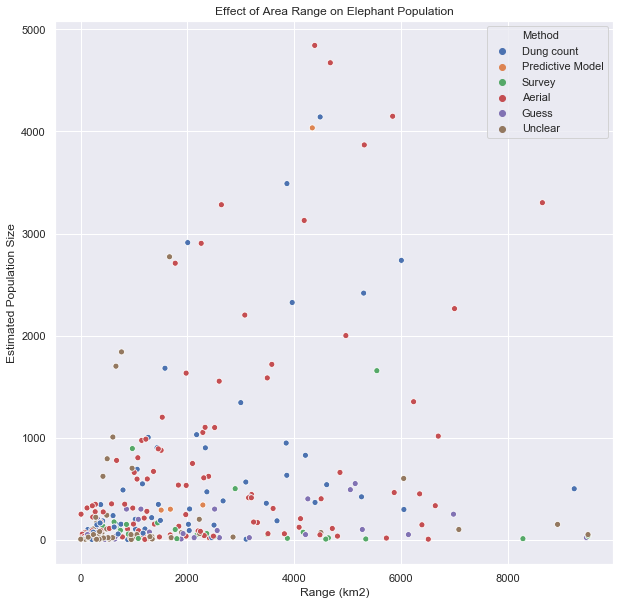

In [27]:
fig, ax = plt.subplots(figsize=dim)
ax = sns.scatterplot(x='Range (km2)', y='Estimate', hue='Method',data=df_elephantrange, ci=None)
ax.set_title('Effect of Area Range on Elephant Population')
ax.set_xlabel('Range (km2)')
ax.set_ylabel('Estimated Population Size')
ax.legend()

In [28]:
df_mike16 = df_mike[df_mike['Year']== 2016]
cols = ['Region','Country','Location','NumberOfIllegalCarcasses']
df_mike16 = df_mike16[cols]
df_mike16 = df_mike16.groupby(['Country','Region']).sum()
df_mike16

,,NumberOfIllegalCarcasses
Country,Region,
Benin,West Africa,19
Botswana,Southern Africa,0
Burkina Faso,West Africa,7
Cameroon,Central Africa,1
Central African Republic,Central Africa,7
Congo,Central Africa,39
Cote d'Ivoire,West Africa,0
Democratic Republic of the Congo,Central Africa,126
Ethiopia,Eastern Africa,8


In [29]:
cols = ['Location','Region','Estimate']
df_elephantclean = df_elephant[cols]
df_elephantclean = df_elephantclean.groupby(['Region']).sum()

In [34]:
df_mike16.reset_index(inplace=True)

In [35]:
df_merge = pd.merge(df_elephantclean,df_mike16,on=['Region','Country'],how='outer')
df_merge

KeyError: 'Country'

In [ ]:
fig, ax = plt.subplots(figsize=dim)
ax = sns.scatterplot(x='Estimate', y='NumberOfIllegalCarcasses', hue='Region',data=df_merge, ci=None)
ax.set_title('Population Estimate vs Poached Carcasses')
ax.set_xlabel('Population Estimate')
ax.set_ylabel('Illegal Carcasses')
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=dim)
ax = sns.countplot(x='Year',hue='Purpose',data=df_ivory)
ax.set_title('Ivory Trade Over Time')
ax.set_xlabel('Year')
ax.set_xticklabels(ax.get_xticklabels())

In [ ]:
df_ivory['Term'].value_counts()

In [ ]:
ivory_replace = {'leather products (small)': 'leather',
                 'leather products (large)': 'leather',
                 'leather items': 'leather',
                 'ivory carvings':'carvings',
                 'feet':'specimens',
                 'skin pieces':'skins',
                 'ears':'skins',
                 'tails':'specimens',
                 'skulls':'bones',
                 'teeth':'teeth and hair',
                 'hair':'teeth and hair',
                 'hair products':'teeth and hair',
                 'shoes':'leather',
                 'bone carvings':'carvings',
                 'ivory scraps':'carvings',
                 'garments':'leather',
                 'bodies':'specimens',
                 'sets of piano keys':'piano keys',
                 'jewellery - ivory ':'carvings',
                 'genitalia':'specimens',
                 'trunk':'specimens',
                 'bone pieces':'bones',
                 'jewellery':'carvings',
                 'skeletons':'bones',
                 'sides':'specimens',
                 'bone products':'bones',
                 'plates':'carvings',
                 'powder':'other',
                 'meat':'other',
                 'furniture':'leather',
                 'extract':'other',
                 'horn pieces':'bones',
                 'skin scraps':'leather'}
df_ivory = df_ivory.replace({'Term': ivory_replace})

In [ ]:
df_ivory['Term'].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=dim)
ax = sns.countplot(x='Year',hue='Term',data=df_ivory)
ax.set_title('Ivory Trade Over Time')
ax.set_xlabel('Year')
ax.set_xticklabels(ax.get_xticklabels())

In [ ]:
df_ivorynew = df_ivory[df_ivory['Year']>2001]
fig, ax = plt.subplots(figsize=dim)
ax = sns.countplot(x='Year',hue='Term',data=df_ivorynew)
ax.set_title('Ivory Trade Over Time Since 2001')
ax.set_xlabel('Year')
ax.set_xticklabels(ax.get_xticklabels())

In [41]:
df_pike = pd.read_csv('pike_trends.csv')
df_pike

,region,estimate,se,df,t.stat,p.value,lower.ci,upper.ci,yr
0,Central Africa,0.609028,0.069496,164,8.763521,2.280000e-15,0.494718,0.723338,2003
1,Central Africa,0.645262,0.061806,164,10.440169,6.940000e-20,0.543601,0.746923,2004
2,Central Africa,0.451803,0.077132,164,5.857515,2.500000e-08,0.324932,0.578674,2005
3,Central Africa,0.509829,0.102028,164,4.996965,1.480000e-06,0.342008,0.677649,2006
4,Central Africa,0.732782,0.081226,164,9.021516,4.760000e-16,0.599177,0.866387,2007
5,Central Africa,0.747130,0.078418,164,9.527573,2.120000e-17,0.618144,0.876115,2008
6,Central Africa,0.632435,0.100739,164,6.277953,2.950000e-09,0.466734,0.798136,2009
7,Central Africa,0.719305,0.087123,164,8.256194,4.740000e-14,0.576001,0.862610,2010
8,Central Africa,0.866633,0.069834,164,12.409972,2.320000e-25,0.751767,0.981499,2011
9,Central Africa,0.816012,0.081438,164,10.020051,9.810000e-19,0.682059,0.949966,2012


In [ ]:
dim = (20,10)
sns.set(font_scale=1)
ax = sns.lmplot(x='yr', y='estimate',hue='region',data=df_pike, height=7)

In [36]:
mike_cols=['Region','Country','PercentPoached','Year']
elephant_cols=['Region','Country','Estimate','Year']

df_elephantnew=df_elephant[elephant_cols]

df_mikenew=df_mike[mike_cols]
df_mikenew['Country'].replace("Cote d'Ivoire",'Cote d’Ivoire',inplace=True)
df_mikenew['Country'].replace('United Republic of Tanzania','Tanzania', inplace=True)
df_mikenew['Country'].replace('Democratic Republic of the Congo','Democratic Republic of Congo',inplace=True)


df_merge2 = pd.merge(df_elephantnew,df_mikenew,on=['Region','Country','Year'],how='outer')
df_merge2

/Users/anita/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Region,Country,Estimate,Year,PercentPoached
0,Central Africa,Cameroon,153.0,2007,0.000000
1,Central Africa,Cameroon,153.0,2007,0.000000
2,Central Africa,Cameroon,246.0,2007,0.000000
3,Central Africa,Cameroon,246.0,2007,0.000000
4,Central Africa,Cameroon,250.0,2007,0.000000
5,Central Africa,Cameroon,250.0,2007,0.000000
6,Central Africa,Cameroon,539.0,2014,1.000000
7,Central Africa,Cameroon,539.0,2014,0.500000
8,Central Africa,Cameroon,1.0,2012,0.875000
9,Central Africa,Cameroon,1.0,2012,0.000000


In [37]:
df_merge2 = df_merge2[df_merge2['Estimate']<20000]
df_merge2

,Region,Country,Estimate,Year,PercentPoached
0,Central Africa,Cameroon,153.0,2007,0.000000
1,Central Africa,Cameroon,153.0,2007,0.000000
2,Central Africa,Cameroon,246.0,2007,0.000000
3,Central Africa,Cameroon,246.0,2007,0.000000
4,Central Africa,Cameroon,250.0,2007,0.000000
5,Central Africa,Cameroon,250.0,2007,0.000000
6,Central Africa,Cameroon,539.0,2014,1.000000
7,Central Africa,Cameroon,539.0,2014,0.500000
8,Central Africa,Cameroon,1.0,2012,0.875000
9,Central Africa,Cameroon,1.0,2012,0.000000


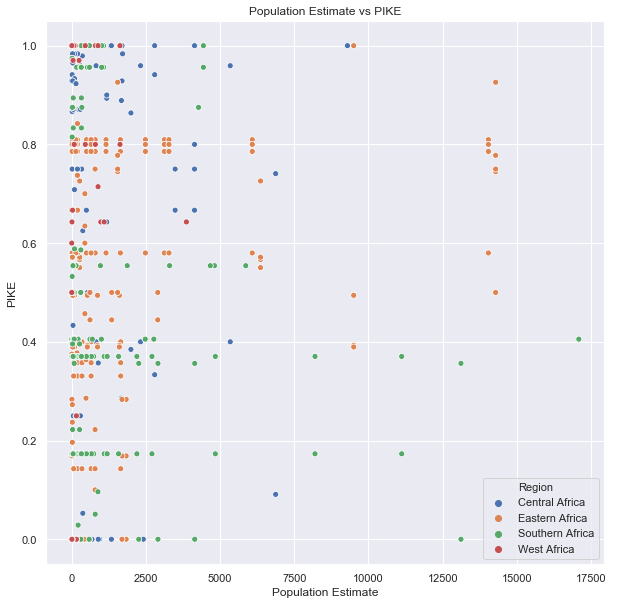

In [38]:
fig, ax = plt.subplots(figsize=dim)
ax = sns.scatterplot(x='Estimate', y='PercentPoached', hue='Region',data=df_merge2, ci=None)
ax.set_title('Population Estimate vs PIKE')
ax.set_xlabel('Population Estimate')
ax.set_ylabel('PIKE')
ax.legend()

In [39]:
df_merge2a = df_merge2.groupby(['Region','Year']).sum()
df_merge2a.reset_index()

,Region,Year,Estimate,PercentPoached
0,Central Africa,2002,4110.0,0.000000
1,Central Africa,2003,889.0,2.642544
2,Central Africa,2004,4860.0,4.609335
3,Central Africa,2005,1080.0,1.500000
4,Central Africa,2006,13600.0,2.274510
5,Central Africa,2007,1816.0,0.972222
6,Central Africa,2008,5986.0,4.666667
7,Central Africa,2009,17464.0,5.590476
8,Central Africa,2010,484.0,8.997701
9,Central Africa,2011,26682.0,24.186016


In [42]:
cols = ['region','estimate','yr']
df_pikenew = df_pike[cols]
df_pikenew.columns=['Region','PIKE','Year']

In [43]:
df_merge3 = pd.merge(df_merge2a,df_pikenew,on=['Region','Year'],how='outer')
df_merge3

,Region,Year,Estimate,PercentPoached,PIKE
0,Central Africa,2002,4110.0,0.000000,NaN
1,Central Africa,2003,889.0,2.642544,0.609028
2,Central Africa,2004,4860.0,4.609335,0.645262
3,Central Africa,2005,1080.0,1.500000,0.451803
4,Central Africa,2006,13600.0,2.274510,0.509829
5,Central Africa,2007,1816.0,0.972222,0.732782
6,Central Africa,2008,5986.0,4.666667,0.747130
7,Central Africa,2009,17464.0,5.590476,0.632435
8,Central Africa,2010,484.0,8.997701,0.719305
9,Central Africa,2011,26682.0,24.186016,0.866633


In [44]:
df_merge3 = df_merge3[df_merge3['Estimate']<30000]

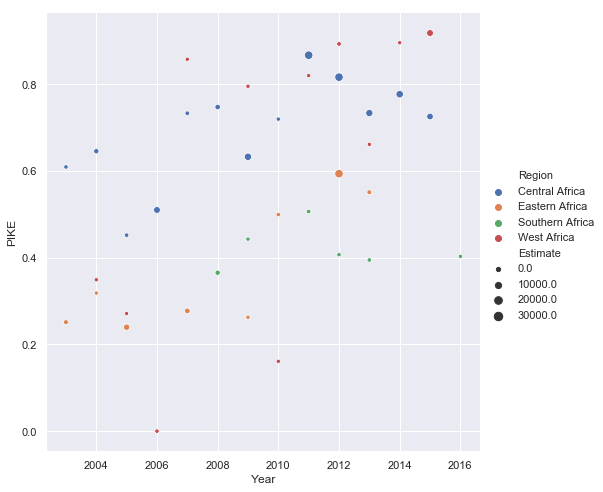

In [45]:
sns.relplot(x='Year', y='PIKE',size='Estimate', hue='Region',data=df_merge3, height=7)


(2002, 2017)

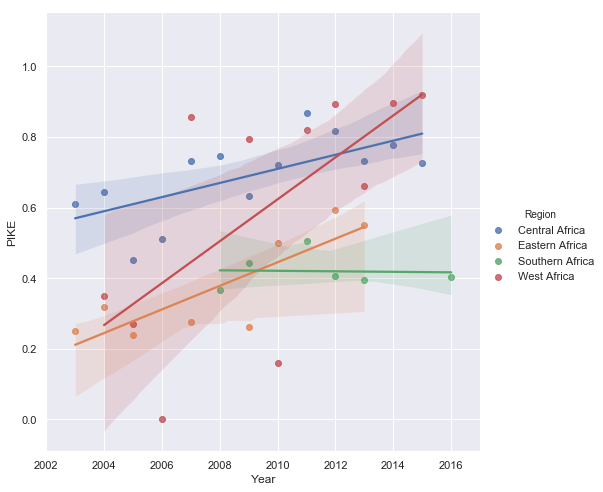

In [46]:
lm = sns.lmplot(x='Year', y='PIKE', hue='Region',data=df_merge3, height=7,truncate=True)
axes = lm.axes
axes[0,0].set_xlim(2002,2017)

(2002, 2017)

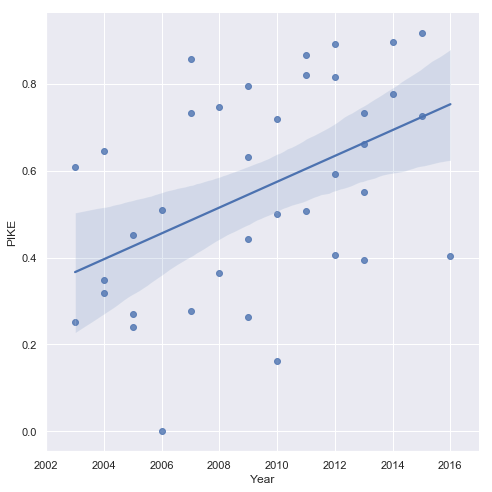

In [47]:
lm = sns.lmplot(x='Year', y='PIKE',data=df_merge3, height=7,truncate=True)
axes = lm.axes
axes[0,0].set_xlim(2002,2017)

In [48]:
df_pike2 = df_pike.groupby(['yr']).mean()
df_pike2 = df_pike2[['estimate']]
df_pike2.reset_index(inplace=True)
df_pike2.columns=['Year','PIKE']

In [49]:
df_ivorynew = df_ivory.groupby('Year').count()
df_ivorynew = df_ivorynew[['Quantity']]
df_ivorynew.reset_index(inplace=True)

In [50]:
df_merge4 = pd.merge(df_ivorynew,df_pike2,on='Year',how='outer')
df_merge4.dropna(inplace=True)
df_merge4

,Year,Quantity,PIKE
14,2003,1183,0.339307
15,2004,1006,0.402034
16,2005,1087,0.310987
17,2006,1147,0.270805
18,2007,1005,0.554429
19,2008,1321,0.606925
20,2009,1493,0.533159
21,2010,1633,0.440865
22,2011,1868,0.704974
23,2012,1993,0.677240


Text(0.5,0,'Year')

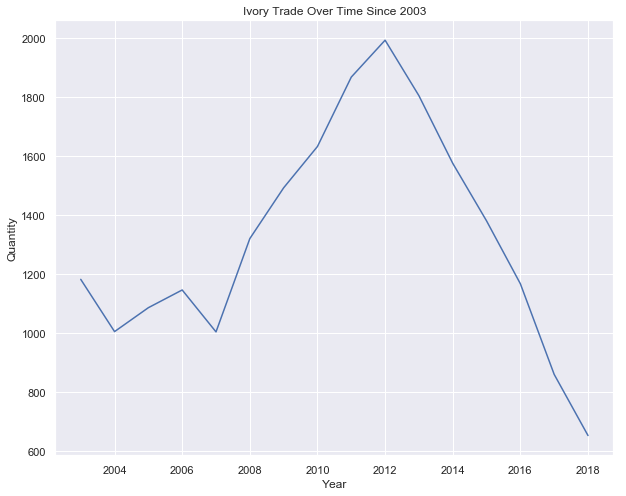

In [51]:
fig, ax = plt.subplots(figsize=[10,8])
ax = sns.lineplot(x='Year',y='Quantity',data=df_merge4)
ax.set_title('Ivory Trade Over Time Since 2003')
ax.set_xlabel('Year')

Text(0,0.5,'PIKE ')

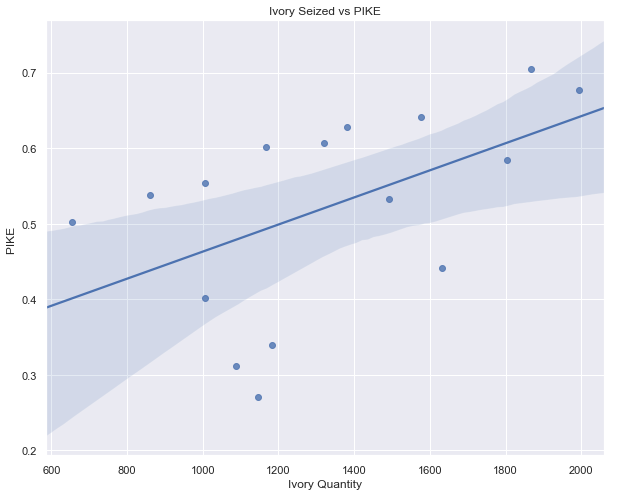

In [52]:
fig, ax = plt.subplots(figsize=[10,8])
ax = sns.regplot(x='Quantity',y='PIKE',data=df_merge4)
ax.set_title('Ivory Seized vs PIKE')
ax.set_xlabel('Ivory Quantity')
ax.set_ylabel('PIKE ')

In [53]:
df_elephant['Country'].unique()

array(['Cameroon', 'Central African Republic', 'Chad', 'Congo',
       'Democratic Republic of Congo', 'Equatorial Guinea', 'Gabon',
       'Eritrea', 'Ethiopia', 'Kenya', 'Rwanda', 'Somalia', 'South Sudan',
       'Tanzania', 'Uganda', 'Angola', 'Botswana', 'Malawi', 'Mozambique',
       'Namibia', 'South Africa', 'Swaziland', 'Zambia', 'Zimbabwe',
       'Benin', 'Burkina Faso', 'Cote d’Ivoire', 'Ghana', 'Guinea',
       'Guinea Bissau', 'Liberia', 'Mali', 'Niger', 'Nigeria', 'Senegal',
       'Sierra Leone', 'Togo'], dtype=object)

In [54]:
df_indicators = pd.read_csv('indicators.csv',header=1)
df_le = pd.read_csv('alldata-Table 1.csv')

In [55]:
df_le['ctry'] = df_le['ctry'].str.upper()

In [56]:
df_le = df_le.replace({'ctry': country_dict})
df_le = df_le[['ctry','legis','rep.score']]
df_le.columns=['Country','LE Score','Reporting Score']
df_le

,Country,LE Score,Reporting Score
0,AE,3,0.251314
1,AO,3,-1.098612
2,AT,1,2.268684
3,AU,1,2.614960
4,BE,1,2.120264
5,BI,3,-0.619039
6,Benin,2,-0.747214
7,Botswana,2,1.550597
8,CA,1,2.104134
9,Democratic Republic of the Congo,3,0.659246


In [57]:
df_indicators = df_indicators[['Country','Value','Index','Year']]
df_indicators

,Country,Value,Index,Year
0,Benin,0.63,GCB,2018
1,Botswana,0.71,GCB,2018
2,Burkina Faso,0.63,GCB,2018
3,Cameroon,0.60,GCB,2018
4,Cabo Verde,0.65,GCB,2018
5,Cote d'Ivoire,0.60,GCB,2018
6,Gabon,0.72,GCB,2018
7,Ghana,0.60,GCB,2018
8,Guinea,0.62,GCB,2018
9,Kenya,0.55,GCB,2018


In [58]:
df_indicators['Value'] = pd.to_numeric(df_indicators['Value'], errors='coerce')

In [59]:
df_indicators2 = df_indicators.pivot_table(index=['Country','Year'], columns='Index')
df_indicators2.reset_index(inplace=True)

In [60]:
df_indicators2['Country'].str.upper()
df_indicators2

Country  Year       Value                                     
Index                       Forest Area Forest area   GCB    HDI   HER   PIA
0             ALBANIA  2006         NaN         NaN  0.53    NaN   NaN   NaN
1        ANGOLA        2006         NaN         NaN   NaN    NaN   NaN  0.30
2        ANGOLA        2009         NaN         NaN   NaN    NaN   NaN  0.30
3        ANGOLA        2012         NaN         NaN   NaN    NaN   NaN  0.27
4           ARGENTINA  2006         NaN         NaN  0.62    NaN   NaN   NaN
5             AUSTRIA  2006         NaN         NaN  0.74    NaN   NaN   NaN
6         Afghanistan  1990         NaN         2.1   NaN    NaN   NaN   NaN
7         Afghanistan  1995         2.1         NaN   NaN    NaN   NaN   NaN
8         Afghanistan  2000         2.1         NaN   NaN    NaN   NaN   NaN
9         Afghanistan  2005         2.1         NaN   NaN    NaN   NaN   NaN
10        Afghanistan  2006         NaN         NaN   NaN  0.419   NaN   NaN
11        Afghanistan  2009         NaN         NaN   NaN  0.447   NaN   NaN
12        Afghanistan  2010         2.1         NaN   NaN    NaN   NaN   NaN
13        Afghanistan  2011         2.1         NaN   NaN    NaN   NaN   NaN
14        Afghanistan  2012         2.1         NaN  0.51  0.479  0.65   NaN
15        Afghanistan  2013         2.1         NaN   NaN    NaN   NaN   NaN
16        Afghanistan  2014         2.1         NaN   NaN    NaN   NaN   NaN
17        Afghanistan  2015         2.1         NaN   NaN  0.490  0.55   NaN
18        Afghanistan  2016         2.1         NaN   NaN    NaN   NaN   NaN
19        Afghanistan  2018         NaN         NaN   NaN  0.496  0.10   NaN
20            Albania  1990         NaN        28.8   NaN    NaN   NaN   NaN
21            Albania  1995        28.4         NaN   NaN    NaN   NaN   NaN
22            Albania  2000        28.1         NaN   NaN    NaN   NaN   NaN
23            Albania  2005        28.6         NaN   NaN    NaN   NaN   NaN
24            Albania  2006         NaN         NaN   NaN  0.709  0.65   NaN
25            Albania  2009         NaN         NaN   NaN  0.729  0.70   NaN
26            Albania  2010        28.3         NaN   NaN    NaN   NaN   NaN
27            Albania  2011        28.3         NaN   NaN    NaN   NaN   NaN
28            Albania  2012        28.3         NaN   NaN  0.771  0.68   NaN
29            Albania  2013        28.2         NaN   NaN    NaN   NaN   NaN
...               ...   ...         ...         ...   ...    ...   ...   ...
3157        macedonia  2009         NaN         NaN  0.63    NaN   NaN   NaN
3158         malaysia  2009         NaN         NaN  0.68    NaN   NaN   NaN
3159          moldova  2009         NaN         NaN  0.59    NaN   NaN   NaN
3160         mongolia  2009         NaN         NaN  0.54    NaN   NaN   NaN
3161          morocco  2009         NaN         NaN  0.53    NaN   NaN   NaN
3162      netherlands  2009         NaN         NaN  0.79    NaN   NaN   NaN
3163          nigeria  2009         NaN         NaN  0.57    NaN   NaN   NaN
3164           norway  2009         NaN         NaN  0.75    NaN   NaN   NaN
3165         pakistan  2009         NaN         NaN  0.53    NaN   NaN   NaN
3166           panama  2009         NaN         NaN  0.52    NaN   NaN   NaN
3167             peru  2009         NaN         NaN  0.55    NaN   NaN   NaN
3168      philippines  2009         NaN         NaN  0.64    NaN   NaN   NaN
3169           poland  2009         NaN         NaN  0.67    NaN   NaN   NaN
3170         portugal  2009         NaN         NaN  0.71    NaN   NaN   NaN
3171          romania  2009         NaN         NaN  0.58    NaN   NaN   NaN
3172           russia  2009         NaN         NaN  0.56    NaN   NaN   NaN
3173          senegal  2009         NaN         NaN  0.53    NaN   NaN   NaN
3174           serbia  2009         NaN         NaN  0.61    NaN   NaN   NaN
3175     sierra leone  2009         NaN         NaN  0.47    NaN   NaN   NaN
3176      

In [61]:
country_list = ['Cameroon', 'Central African Republic', 'Chad', 'Congo',
       'Democratic Republic of Congo', 'Equatorial Guinea', 'Gabon',
       'Eritrea', 'Ethiopia', 'Kenya', 'Rwanda', 'Somalia', 'South Sudan',
       'Tanzania', 'Uganda', 'Angola', 'Botswana', 'Malawi', 'Mozambique',
       'Namibia', 'South Africa', 'Swaziland', 'Zambia', 'Zimbabwe',
       'Benin', 'Burkina Faso', 'Cote d’Ivoire', 'Ghana', 'Guinea',
       'Guinea Bissau', 'Liberia', 'Mali', 'Niger', 'Nigeria', 'Senegal',
       'Sierra Leone', 'Togo'
    
]

In [62]:
df_indicators3 = df_indicators2[df_indicators2['Country'].isin(country_list)]
df_indicators3 = df_indicators3[df_indicators3['Year']>2000]
df_indicators3

Country  Year       Value                                     
Index                 Forest Area Forest area   GCB    HDI   HER   PIA
65       Angola  2005        47.4         NaN   NaN    NaN   NaN   NaN
66       Angola  2006         NaN         NaN   NaN  0.466  0.30   NaN
67       Angola  2009         NaN         NaN   NaN  0.508  0.38   NaN
68       Angola  2010        46.9         NaN   NaN    NaN   NaN   NaN
69       Angola  2011        46.8         NaN   NaN    NaN   NaN   NaN
70       Angola  2012        46.7         NaN   NaN  0.537  0.38   NaN
71       Angola  2013        46.6         NaN   NaN    NaN   NaN   NaN
72       Angola  2014        46.5         NaN   NaN    NaN   NaN   NaN
73       Angola  2015        46.4         NaN   NaN  0.565  0.40   NaN
74       Angola  2016        46.3         NaN   NaN    NaN   NaN   NaN
75       Angola  2018         NaN         NaN   NaN  0.574  0.35  0.33
279       Benin  2005        42.7         NaN   NaN    NaN   NaN   NaN
280       Benin  2006         NaN         NaN   NaN  0.447  0.45   NaN
281       Benin  2009         NaN         NaN   NaN  0.468  0.55   NaN
282       Benin  2010        40.4         NaN   NaN    NaN   NaN   NaN
283       Benin  2011        40.0         NaN   NaN    NaN   NaN   NaN
284       Benin  2012        39.6         NaN   NaN  0.489  0.60   NaN
285       Benin  2013        39.1         NaN   NaN    NaN   NaN   NaN
286       Benin  2014        38.7         NaN   NaN    NaN   NaN   NaN
287       Benin  2015        38.2         NaN  0.62  0.510  0.63  0.47
288       Benin  2016        37.8         NaN   NaN    NaN   NaN   NaN
289       Benin  2018         NaN         NaN  0.63  0.520  0.60  0.47
340    Botswana  2005        21.1         NaN   NaN    NaN   NaN   NaN
341    Botswana  2006         NaN         NaN   NaN  0.612  0.70   NaN
342    Botswana  2009         NaN         NaN   NaN  0.647  0.75   NaN
343    Botswana  2010        20.0         NaN   NaN    NaN   NaN   NaN
344    Botswana  2011        19.8         NaN   NaN    NaN   NaN   NaN
345    Botswana  2012        19.7         NaN   NaN  0.687  0.70   NaN
346    Botswana  2013        19.5         NaN   NaN    NaN   NaN   NaN
347    Botswana  2014        19.3         NaN   NaN    NaN   NaN   NaN
...         ...   ...         ...         ...   ...    ...   ...   ...
2920     Uganda  2010        13.7         NaN   NaN    NaN   NaN   NaN
2921     Uganda  2011        13.1         NaN   NaN    NaN   NaN   NaN
2922     Uganda  2012        12.4         NaN  0.38  0.497  0.53   NaN
2923     Uganda  2013        11.7         NaN   NaN    NaN   NaN   NaN
2924     Uganda  2014        11.0         NaN   NaN    NaN   NaN   NaN
2925     Uganda  2015        10.4         NaN  0.60  0.515  0.50  0.47
2926     Uganda  2016         9.7         NaN   NaN    NaN   NaN   NaN
2927     Uganda  2018         NaN         NaN  0.54  0.528  0.48  0.47
3093     Zambia  2005        67.7         NaN   NaN    NaN   NaN   NaN
3094     Zambia  2006         NaN         NaN   NaN  0.486  0.50   NaN
3095     Zambia  2009         NaN         NaN   NaN  0.521  0.50   NaN
3096     Zambia  2010        66.5         NaN   NaN    NaN   NaN   NaN
3097     Zambia  2011        66.3         NaN   NaN    NaN   NaN   NaN
3098     Zambia  2012        66.1         NaN   NaN  0.552  0.53   NaN
3099     Zambia  2013        65.9         NaN   NaN    NaN   NaN   NaN
3100     Zambia  2014        65.6         NaN   NaN    NaN   NaN   NaN
3101     Zambia  2015        65.4         NaN  0.76  0.570  0.50  0.47
3102     Zambia  2016        65.2         NaN   NaN    NaN   NaN   NaN
3103     Zambia  2018         NaN         NaN  0.64  0.591  0.53  0.47
3107   Zimbabwe  2005        44.6         NaN   NaN    NaN   NaN   NaN
3108   Zimbabwe  2006         NaN         NaN   NaN  0.429  0.15   NaN
3109   Zimbabwe  2009         NaN         NaN   NaN  0.448  0.05   NaN
3110   Zimbabwe  2010        40.4         NaN   NaN    NaN   NaN   NaN
3111   Zimbabwe  2011        39.

In [63]:
df_indicators3.columns = df_indicators3.columns.get_level_values(0)
df_indicators3.columns = ['Country','Year','Forest Area','Forest area','GCB','HDI','HER','PIA']

In [64]:
df_merge5 = pd.merge(df_merge2,df_indicators3,on=['Country','Year'],how='outer')
df_merge5 = df_merge5[['Region','Country','Estimate','Year','PercentPoached','Forest Area','GCB','HDI','HER','PIA']]

In [65]:
df_merge5

,Region,Country,Estimate,Year,PercentPoached,Forest Area,GCB,HDI,HER,PIA
0,Central Africa,Cameroon,153.0,2007,0.000000,NaN,NaN,NaN,NaN,NaN
1,Central Africa,Cameroon,153.0,2007,0.000000,NaN,NaN,NaN,NaN,NaN
2,Central Africa,Cameroon,246.0,2007,0.000000,NaN,NaN,NaN,NaN,NaN
3,Central Africa,Cameroon,246.0,2007,0.000000,NaN,NaN,NaN,NaN,NaN
4,Central Africa,Cameroon,250.0,2007,0.000000,NaN,NaN,NaN,NaN,NaN
5,Central Africa,Cameroon,250.0,2007,0.000000,NaN,NaN,NaN,NaN,NaN
6,Central Africa,Cameroon,539.0,2014,1.000000,40.3,NaN,NaN,NaN,NaN
7,Central Africa,Cameroon,539.0,2014,0.500000,40.3,NaN,NaN,NaN,NaN
8,Central Africa,Cameroon,1.0,2012,0.875000,41.2,0.34,0.524,0.43,NaN
9,Central Africa,Cameroon,1.0,2012,0.000000,41.2,0.34,0.524,0.43,NaN


In [66]:
df_merge6 = df_merge5.groupby(['Region','Year']).mean()

In [67]:
df_merge6.reset_index(inplace=True)

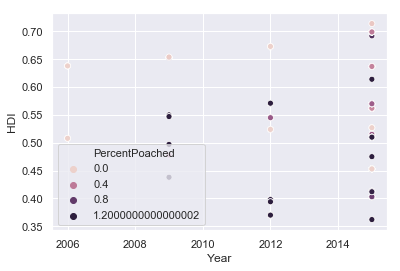

In [139]:
lm = sns.scatterplot(x='Year', y='HDI', hue='PercentPoached',data=df_merge5)

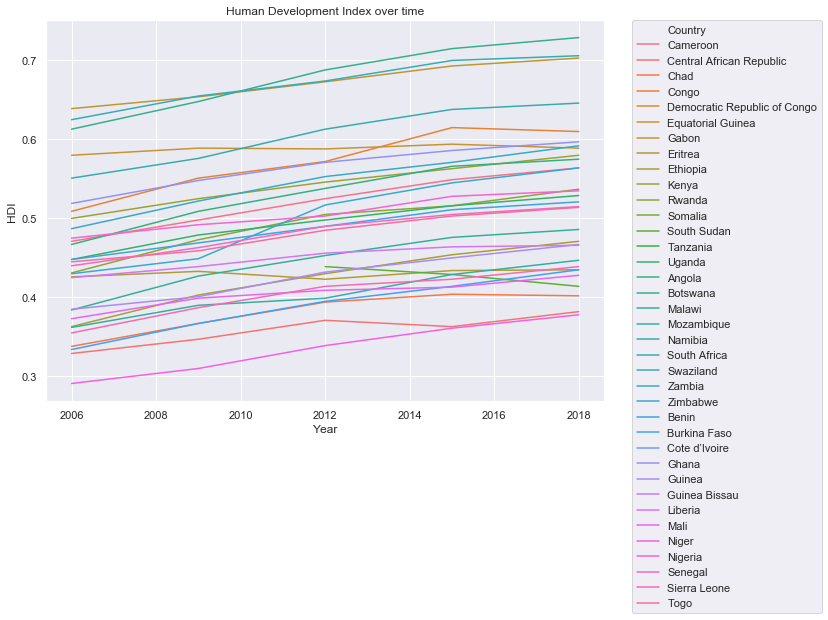

In [123]:
fig, ax = plt.subplots(figsize=[10,7])
ax = sns.lineplot(x='Year', y='HDI', hue='Country',data=df_merge5, ci=None)
ax.set_title('Human Development Index over time')
ax.set_xlabel('Year')
ax.set_ylabel('HDI')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

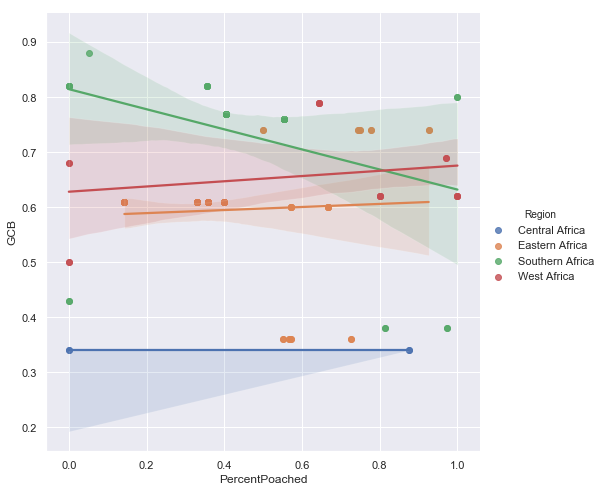

In [111]:
lm = sns.lmplot(x='PercentPoached', y='GCB', hue='Region',data=df_merge5, height=7,truncate=True)

No handles with labels found to put in legend.


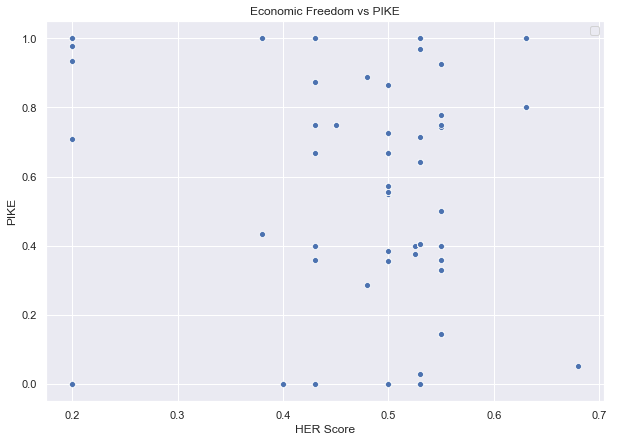

In [86]:
fig, ax = plt.subplots(figsize=[10,7])
ax = sns.scatterplot(x='HER', y='PercentPoached',data=df_merge5, ci=None)
ax.set_title('Economic Freedom vs PIKE')
ax.set_xlabel('HER Score')
ax.set_ylabel('PIKE')
ax.legend()

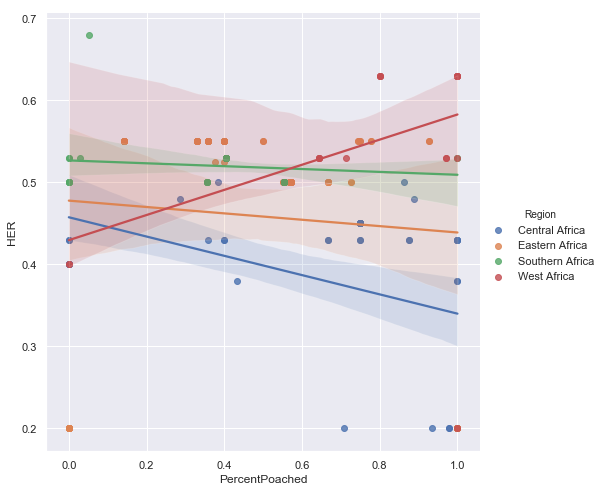

In [120]:
lm = sns.lmplot(x='PercentPoached', y='HER', hue='Region',data=df_merge5, height=7,truncate=True)

No handles with labels found to put in legend.


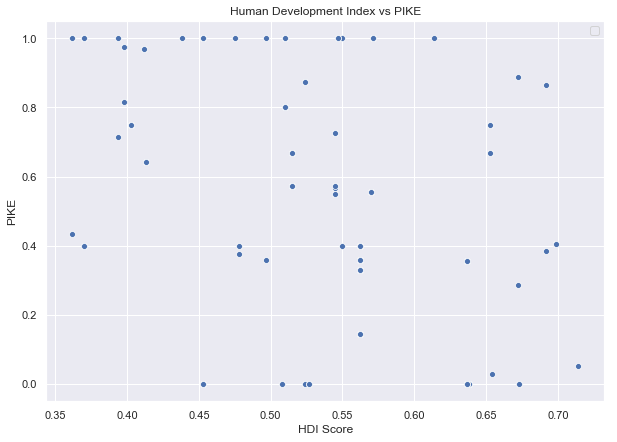

In [87]:
fig, ax = plt.subplots(figsize=[10,7])
ax = sns.scatterplot(x='HDI', y='PercentPoached',data=df_merge5, ci=None)
ax.set_title('Human Development Index vs PIKE')
ax.set_xlabel('HDI Score')
ax.set_ylabel('PIKE')
ax.legend()

No handles with labels found to put in legend.


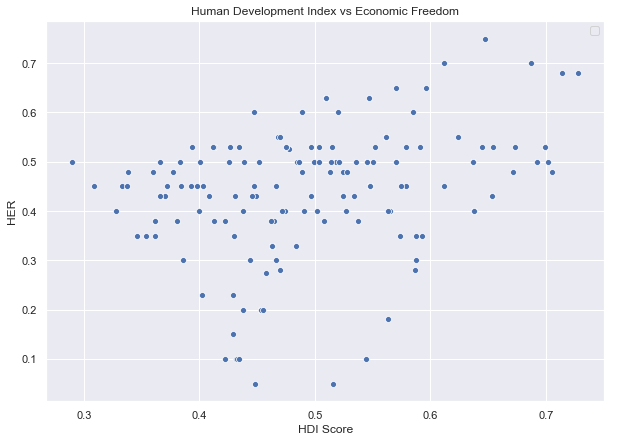

In [72]:
fig, ax = plt.subplots(figsize=[10,7])
ax = sns.scatterplot(x='HDI', y='HER',data=df_merge5, ci=None)
ax.set_title('Human Development Index vs Economic Freedom')
ax.set_xlabel('HDI Score')
ax.set_ylabel('HER')
ax.legend()

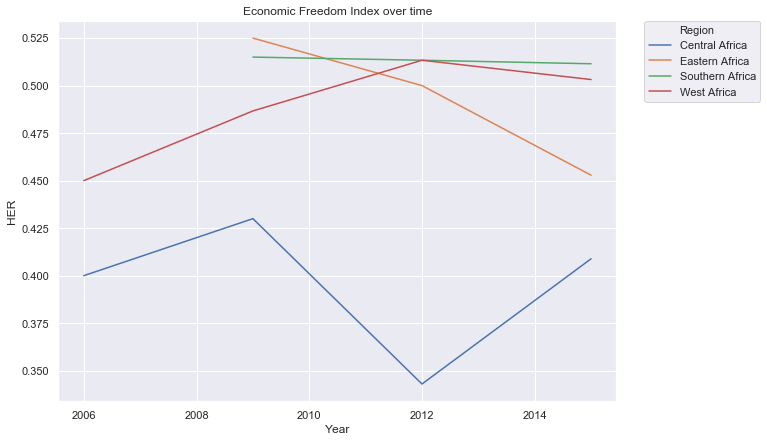

In [84]:
fig, ax = plt.subplots(figsize=[10,7])
ax = sns.lineplot(x='Year', y='HER',hue='Region',data=df_merge5, ci=None, legend="brief")
ax.set_title('Economic Freedom Index over time')
ax.set_xlabel('Year')
ax.set_ylabel('HER')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)